# TRIANGULACIÓN DE DELAUNAY

In [28]:
import numpy as np
import math
from scipy.spatial import Delaunay
from scipy.interpolate import lagrange
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import splprep
from scipy.interpolate import splrep
from scipy.interpolate import splev
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import triangle as tr
import time

## 1. Crear una triangulación 3D
* Cargar cordenadas de los conos

In [4]:
#innerConePosition = [(6.49447171658257,41.7389113024907),(8.49189149682204,41.8037451937836),(10.4848751821667,41.8690573815958),(12.4735170408320,41.9319164105607),(14.4579005366844,41.9894100214277),(16.4380855350346,42.0386448286094),(22.3534294484539,42.1081444836209),(24.3165071700586,42.0957886616701),(26.2748937812757,42.0609961552005),(28.2282468521326,42.0009961057027),(30.1761149294924,41.9130441723441),(32.0795946202318,41.7896079706255),(33.8817199327800,41.5914171121172),(37.1238045770298,40.8042280456036),(38.5108000329817,40.1631834270328),(40.7498148915033,38.2980872410971),(41.6428012725483,37.0572740958520),(42.3684952713925,35.6541128117207),(42.9237412798850,34.1220862330776),(43.4562377484922,30.9418382209873),(43.4041825643156,29.3682424552239),(43.1310900802234,27.8454335309325),(42.6373380962399,26.4081334491868),(41.9213606895600,25.0723633391567),(39.8493389129556,22.6733478226331),(37.1330772214184,20.7325660900255),(35.6438750732877,19.9947555768891),(34.0970198095490,19.4366654165469),(32.5117013027651,19.0709696852617),(30.9105163807122,18.9081142458350),(29.3050197645280,18.9545691109581),(27.6851829730976,19.2045278218877),(24.4759113345748,20.2570787967781),(21.3685688158133,21.9377743574784),(19.8072187451783,22.9775182612717),(18.2040616100214,24.1054677217171),(16.5291821840059,25.2778069272720),(14.7490275765791,26.4446189166734),(10.7566166245341,28.5122919557571),(8.59035703212379,29.2671114310357),(6.36970146209175,29.8034933598624),(4.11753580708921,30.1252372241127),(-0.405973075502234,30.1500578730274),(-2.75740378439869,29.8083496207198),(-7.53032772904185,27.7630095130657),(-9.55882345130782,25.8360602858122),(-10.9967405848897,23.4446538263345),(-11.7530941810305,20.7728147412547),(-11.7945553145768,18.0098876247875),(-11.1377067999357,15.3398589997259),(-9.84329815385971,12.9293912425976),(-4.31864858110937,8.32717777382664),(-2.64821833398598,7.33684919790624),(-1.23396167898668,6.38669110355496),(-0.139159724307982,5.41310565569044),(0.583196113153409,4.42232005043196),(1.00846697640521,3.25999992647677),(1.42452204766312,-0.235409796458984),(1.70769766109080,-2.50157264279400),(2.43395748729283,-5.02746251429141),(5.90118769712182,-9.36241405660719),(8.13219227914984,-10.6723062142501),(10.4108490166236,-11.5249176387577),(14.7174578544944,-12.4162331505645),(16.6611999625517,-12.7135418322201),(18.4669199253036,-13.0527675263258),(20.2513584750154,-13.4902268953088),(22.0275043214267,-14.0208096878619),(23.7938485314227,-14.6351269687361),(29.0380553533840,-16.8864873288738),(30.7681622622371,-17.7392626196140),(32.3760783979903,-18.6039808584518),(33.7897740653103,-19.5166383512928),(34.9667330396653,-20.5090458088496),(35.8614855279756,-21.5808775016001),(36.4612858521334,-22.7451308643890),(36.8711477182864,-25.4557910211687),(36.6696611457761,-26.8930663715963),(35.5175477601575,-29.6867414698392),(34.6369025552692,-30.9011171932826),(33.5888282300982,-31.9233335254203),(32.4026659456202,-32.7184009884738),(29.6211021726631,-33.5886007841515),(27.9849204584717,-33.7170193136260),(26.2183096377485,-33.6848022646400),(24.3309596262912,-33.5465676173721),(22.3208062313579,-33.3726612899257),(18.1328018280879,-33.1964401661521),(14.1429922166079,-33.1731958647648),(12.2313503871593,-33.1266878316603),(10.3778348140314,-33.0132052855498),(8.58829435522285,-32.8040580663346),(6.84064584789227,-32.4725374962639),(5.07009944482550,-32.0172508962124),(3.27322533222869,-31.4640545504384),(-0.418687595522242,-30.1796696447230),(-4.09627739578414,-28.8238238024923),(-5.89202160786470,-28.1122858460715),(-7.65255868890126,-27.3645667343373),(-9.37355826729420,-26.5706223212060),(-11.0772549160090,-25.7164049091686),(-14.4775165017317,-23.8562440887552),(-16.1852335110450,-22.8738429891042),(-17.9066984601430,-21.8724503885825),(-19.6280899733090,-20.8717543910881),(-22.9283852622260,-18.8697018891971),(-24.4790807692059,-17.8277052050408),(-27.3051265922114,-15.5801090683244),(-28.5448479313762,-14.3530174024786),(-29.6530218737847,-13.0404842531107),(-30.6444406510768,-11.6234683085559),(-31.5169602294234,-10.1146356600596),(-32.2692264908853,-8.52739205631154),(-32.9016624434539,-6.87420998418598),(-34.1160057737752,-1.60803776182190),(-34.3261608207142,0.237322459171913),(-34.4624174228984,2.11880932640591),(-34.5407037273032,4.03273612643633),(-34.5779532171168,5.97700580252438),(-34.5920061096721,7.95066706685753),(-34.6203010935088,11.9628384547546),(-34.6463516562825,13.9656473217268),(-34.6751545298116,15.9616504117489),(-34.7230350194217,19.9334733431980),(-34.7332354577762,21.9093507078716),(-34.7284338451120,23.8784778261844),(-34.6466389854161,27.7320065787716),(-34.4887912178893,29.4532110956616),(-34.1674004338218,30.9833511541837),(-33.6523388115164,32.2835000565933),(-32.9540435069214,33.3001054449054),(-32.0153881487289,34.0792118997941),(-28.7867224485036,35.7027232116937),(-26.8737074947600,36.7067299514829),(-21.7623826032159,39.5958663210330),(-20.1418625665089,40.3549987041733),(-18.5286281071084,40.9596629960629),(-16.9269162480936,41.3805845888608),(-15.2947586791386,41.6060043323431),(-13.5312107482484,41.6777684016896),(-9.64289482747188,41.5853268011948),(-7.61112976471737,41.5421552074769),(-5.58318659783131,41.5226049040385),(-1.53976115651896,41.5427010208205),(0.475431094342800,41.5765527022834),(2.48619653317858,41.6224387797260),(6.49447171658257,41.7389113024907),(8.49189149682204,41.8037451937836),(10.4848751821667,41.8690573815958),(12.4735170408320,41.9319164105607),(14.4579005366844,41.9894100214277)] # load inner cone x and y coordinates
#outerConePosition = [(8.29483356036796,47.8005083348189),(10.2903642978411,47.8659036790991),(12.2903853701921,47.9291209919643),(14.2949817462715,47.9871977358879),(16.3042155724446,48.0371512121282),(18.3181128601480,48.0759783968909),(24.3872198920862,48.0953719564451),(26.4188343006777,48.0592693339474),(28.4542241392916,47.9967391176812),(30.4929111587893,47.9046750145358),(32.5715480310539,47.7694057800486),(34.7354354110013,47.5303707137414),(36.9671887094624,47.1090924863221),(41.4608084515852,45.3878796220444),(43.5486168233166,43.9466679046951),(46.7637769841785,40.1838709296144),(47.8711744070693,38.0458741563760),(48.6759026786991,35.8287318442088),(49.2095764033813,33.5308461962448),(49.3717906596030,28.7456240961468),(48.9402528124274,26.3442245678724),(48.1379348685719,24.0115869446911),(46.9718766730536,21.8331831495909),(45.5183908761479,19.8937545099424),(42.0344522843090,16.7521854290723),(38.0024261140352,14.4777602906678),(35.7974585974047,13.6826661179064),(33.4965697064231,13.1523520909686),(31.1302557069132,12.9121393769316),(28.7495405480103,12.9803375419597),(26.4275819814214,13.3378047377686),(24.1935407090117,13.9452300781406),(20.0475993937396,15.7534500265274),(16.3951857815830,18.0421326577611),(14.7344934919394,19.2103582158950),(13.1401972893467,20.3265665388672),(11.5833537070008,21.3477072094266),(10.0428032559345,22.2341839570762),(6.90006888859156,23.5101221144020),(5.24310276950825,23.9102111346615),(3.54614319085073,24.1525066527486),(1.82453456285617,24.2384953941222),(-1.49646987010121,23.9423419780574),(-2.88611819700968,23.5188503619890),(-4.87663538345929,22.0841121388762),(-5.48860547878733,21.0654842962416),(-5.81567263287249,19.9085084532591),(-5.83349192339180,18.6923268134878),(-5.53917605118359,17.4977407053060),(-4.95012865665813,16.4016948398736),(-4.05317915721677,15.4107620877673),(0.492121533127250,12.4494087837712),(2.38653784056378,11.1712478467585),(4.26363974073903,9.48929957533922),(5.87263326747036,7.25460792254726),(6.83628597561633,4.68706884998182),(7.22868549746256,2.31823546262226),(7.60968340642873,-1.42149659832866),(7.97509056184070,-2.72619237583490),(8.54802041473498,-3.68009075055991),(10.6601317831479,-5.23084300440234),(12.1167992046948,-5.77254995615783),(13.7805173778787,-6.17261534649334),(17.6231089179688,-6.79114948102549),(19.7388585053217,-7.18913620702706),(21.8298950982966,-7.70159820373082),(23.8771264994103,-8.31301696223576),(25.8797524901441,-9.00938215804746),(27.8385154732156,-9.77726113305095),(33.4828656272925,-12.3885256946890),(35.3884273243004,-13.4149776838374),(37.3243202944926,-14.6682383106842),(39.1922962154652,-16.2493960759111),(40.8455371260767,-18.2403341823979),(42.0705518955054,-20.6153105774461),(42.7346589897432,-23.1596769590206),(42.5147079384368,-28.2478460553850),(41.7538036771420,-30.6144579632713),(39.1831183440142,-34.8167170198948),(37.3770559671547,-36.5762176430613),(35.2523671945937,-37.9984770098583),(32.8791324240351,-38.9934826446380),(28.1270516052592,-39.7153356388220),(25.9046030197368,-39.6765956654354),(23.8121031317075,-39.5240911796868),(21.8464792201864,-39.3538830619781),(19.9742827992146,-39.2418187116909),(16.0937484438592,-39.1847191943436),(11.9928246424488,-39.1219447460144),(9.86352410414552,-38.9911216862446),(7.69014987529461,-38.7364552625087),(5.51782683234722,-38.3249002543397),(3.42382206323132,-37.7869797271760),(1.40682879137184,-37.1663842455962),(-0.541821138011257,-36.5027177844325),(-4.34015621146816,-35.1410426555394),(-8.16436000121084,-33.6653461038145),(-10.0767778404464,-32.8530238495275),(-11.9792230934156,-31.9752972248347),(-13.8428086034457,-31.0410375539532),(-15.6623928384561,-30.0682796038662),(-19.1958077261686,-28.0638760232219),(-20.9238240938196,-27.0586776214187),(-22.6524765196268,-26.0537507263292),(-24.4077080359509,-25.0144494209715),(-27.9360780875981,-22.7317004681533),(-29.6698538901663,-21.4381474644069),(-32.9453564203185,-18.4316844689044),(-34.4107565227371,-16.6961594315364),(-35.7065080013589,-14.8445665903860),(-36.8313109009813,-12.8998963192641),(-37.7878917266941,-10.8820330087871),(-38.5811746376266,-8.80892992160400),(-39.2178699842561,-6.69652639898087),(-40.3011807339499,-0.309611756649864),(-40.4533406202231,1.78890139416343),(-40.5382789183978,3.86217286202336),(-40.5775538214583,5.90777727960811),(-40.5919497511314,7.92466131148779),(-40.6014196538181,9.91275631233656),(-40.6457557289961,13.8810850824754),(-40.6745334498720,15.8753221224371),(-40.7017394704418,17.8763494567535),(-40.7332264185658,21.8989357934230),(-40.7282871101318,23.9204396925825),(-40.7033369152928,25.9485603009070),(-40.4291604069450,30.2970202551981),(-39.9260632680985,32.6679289532538),(-38.9665731582284,35.0689826553948),(-37.4022554152914,37.3266934320522),(-35.2924298638551,39.1052438930590),(-33.2056190082383,40.2549711124138),(-29.7935826692359,41.9483259837501),(-28.1179159337869,42.9113732230407),(-22.4882559681602,45.8771756304123),(-20.3655683666973,46.6715497668858),(-18.1093389106216,47.2629205744315),(-15.7909195473899,47.5854545071348),(-13.5681633690504,47.6776546092619),(-11.4644254110510,47.6457593795914),(-7.51988574761303,47.5414613781388),(-5.55737846449435,47.5225493988029),(-3.59058902924480,47.5236739806379),(0.355197826404633,47.5753479114301),(2.33404449770947,47.6205092826547),(4.31684977705784,47.6749328204622),(8.29483356036796,47.8005083348189),(10.2903642978411,47.8659036790991),(12.2903853701921,47.9291209919643),(14.2949817462715,47.9871977358879),(16.3042155724446,48.0371512121282)] # load outer cone x and y coordinates

innerConePosition = np.array([[6.49447171658257,41.7389113024907],[8.49189149682204,41.8037451937836],[10.4848751821667,41.8690573815958],[12.4735170408320,41.9319164105607],[14.4579005366844,41.9894100214277],[16.4380855350346,42.0386448286094],[22.3534294484539,42.1081444836209],[24.3165071700586,42.0957886616701],[26.2748937812757,42.0609961552005],[28.2282468521326,42.0009961057027],[30.1761149294924,41.9130441723441],[32.0795946202318,41.7896079706255],[33.8817199327800,41.5914171121172],[37.1238045770298,40.8042280456036],[38.5108000329817,40.1631834270328],[40.7498148915033,38.2980872410971],[41.6428012725483,37.0572740958520],[42.3684952713925,35.6541128117207],[42.9237412798850,34.1220862330776],[43.4562377484922,30.9418382209873],[43.4041825643156,29.3682424552239],[43.1310900802234,27.8454335309325],[42.6373380962399,26.4081334491868],[41.9213606895600,25.0723633391567],[39.8493389129556,22.6733478226331],[37.1330772214184,20.7325660900255],[35.6438750732877,19.9947555768891],[34.0970198095490,19.4366654165469],[32.5117013027651,19.0709696852617],[30.9105163807122,18.9081142458350],[29.3050197645280,18.9545691109581],[27.6851829730976,19.2045278218877],[24.4759113345748,20.2570787967781],[21.3685688158133,21.9377743574784],[19.8072187451783,22.9775182612717],[18.2040616100214,24.1054677217171],[16.5291821840059,25.2778069272720],[14.7490275765791,26.4446189166734],[10.7566166245341,28.5122919557571],[8.59035703212379,29.2671114310357],[6.36970146209175,29.8034933598624],[4.11753580708921,30.1252372241127],[-0.405973075502234,30.1500578730274],[-2.75740378439869,29.8083496207198],[-7.53032772904185,27.7630095130657],[-9.55882345130782,25.8360602858122],[-10.9967405848897,23.4446538263345],[-11.7530941810305,20.7728147412547],[-11.7945553145768,18.0098876247875],[-11.1377067999357,15.3398589997259],[-9.84329815385971,12.9293912425976],[-4.31864858110937,8.32717777382664],[-2.64821833398598,7.33684919790624],[-1.23396167898668,6.38669110355496],[-0.139159724307982,5.41310565569044],[0.583196113153409,4.42232005043196],[1.00846697640521,3.25999992647677],[1.42452204766312,-0.235409796458984],[1.70769766109080,-2.50157264279400],[2.43395748729283,-5.02746251429141],[5.90118769712182,-9.36241405660719],[8.13219227914984,-10.6723062142501],[10.4108490166236,-11.5249176387577],[14.7174578544944,-12.4162331505645],[16.6611999625517,-12.7135418322201],[18.4669199253036,-13.0527675263258],[20.2513584750154,-13.4902268953088],[22.0275043214267,-14.0208096878619],[23.7938485314227,-14.6351269687361],[29.0380553533840,-16.8864873288738],[30.7681622622371,-17.7392626196140],[32.3760783979903,-18.6039808584518],[33.7897740653103,-19.5166383512928],[34.9667330396653,-20.5090458088496],[35.8614855279756,-21.5808775016001],[36.4612858521334,-22.7451308643890],[36.8711477182864,-25.4557910211687],[36.6696611457761,-26.8930663715963],[35.5175477601575,-29.6867414698392],[34.6369025552692,-30.9011171932826],[33.5888282300982,-31.9233335254203],[32.4026659456202,-32.7184009884738],[29.6211021726631,-33.5886007841515],[27.9849204584717,-33.7170193136260],[26.2183096377485,-33.6848022646400],[24.3309596262912,-33.5465676173721],[22.3208062313579,-33.3726612899257],[18.1328018280879,-33.1964401661521],[14.1429922166079,-33.1731958647648],[12.2313503871593,-33.1266878316603],[10.3778348140314,-33.0132052855498],[8.58829435522285,-32.8040580663346],[6.84064584789227,-32.4725374962639],[5.07009944482550,-32.0172508962124],[3.27322533222869,-31.4640545504384],[-0.418687595522242,-30.1796696447230],[-4.09627739578414,-28.8238238024923],[-5.89202160786470,-28.1122858460715],[-7.65255868890126,-27.3645667343373],[-9.37355826729420,-26.5706223212060],[-11.0772549160090,-25.7164049091686],[-14.4775165017317,-23.8562440887552],[-16.1852335110450,-22.8738429891042],[-17.9066984601430,-21.8724503885825],[-19.6280899733090,-20.8717543910881],[-22.9283852622260,-18.8697018891971],[-24.4790807692059,-17.8277052050408],[-27.3051265922114,-15.5801090683244],[-28.5448479313762,-14.3530174024786],[-29.6530218737847,-13.0404842531107],[-30.6444406510768,-11.6234683085559],[-31.5169602294234,-10.1146356600596],[-32.2692264908853,-8.52739205631154],[-32.9016624434539,-6.87420998418598],[-34.1160057737752,-1.60803776182190],[-34.3261608207142,0.237322459171913],[-34.4624174228984,2.11880932640591],[-34.5407037273032,4.03273612643633],[-34.5779532171168,5.97700580252438],[-34.5920061096721,7.95066706685753],[-34.6203010935088,11.9628384547546],[-34.6463516562825,13.9656473217268],[-34.6751545298116,15.9616504117489],[-34.7230350194217,19.9334733431980],[-34.7332354577762,21.9093507078716],[-34.7284338451120,23.8784778261844],[-34.6466389854161,27.7320065787716],[-34.4887912178893,29.4532110956616],[-34.1674004338218,30.9833511541837],[-33.6523388115164,32.2835000565933],[-32.9540435069214,33.3001054449054],[-32.0153881487289,34.0792118997941],[-28.7867224485036,35.7027232116937],[-26.8737074947600,36.7067299514829],[-21.7623826032159,39.5958663210330],[-20.1418625665089,40.3549987041733],[-18.5286281071084,40.9596629960629],[-16.9269162480936,41.3805845888608],[-15.2947586791386,41.6060043323431],[-13.5312107482484,41.6777684016896],[-9.64289482747188,41.5853268011948],[-7.61112976471737,41.5421552074769],[-5.58318659783131,41.5226049040385],[-1.53976115651896,41.5427010208205],[0.475431094342800,41.5765527022834],[2.48619653317858,41.6224387797260],[6.49447171658257,41.7389113024907],[8.49189149682204,41.8037451937836],[10.4848751821667,41.8690573815958],[12.4735170408320,41.9319164105607],[14.4579005366844,41.9894100214277]]) # load inner cone x and y coordinates
outerConePosition = np.array([[8.29483356036796,47.8005083348189],[10.2903642978411,47.8659036790991],[12.2903853701921,47.9291209919643],[14.2949817462715,47.9871977358879],[16.3042155724446,48.0371512121282],[18.3181128601480,48.0759783968909],[24.3872198920862,48.0953719564451],[26.4188343006777,48.0592693339474],[28.4542241392916,47.9967391176812],[30.4929111587893,47.9046750145358],[32.5715480310539,47.7694057800486],[34.7354354110013,47.5303707137414],[36.9671887094624,47.1090924863221],[41.4608084515852,45.3878796220444],[43.5486168233166,43.9466679046951],[46.7637769841785,40.1838709296144],[47.8711744070693,38.0458741563760],[48.6759026786991,35.8287318442088],[49.2095764033813,33.5308461962448],[49.3717906596030,28.7456240961468],[48.9402528124274,26.3442245678724],[48.1379348685719,24.0115869446911],[46.9718766730536,21.8331831495909],[45.5183908761479,19.8937545099424],[42.0344522843090,16.7521854290723],[38.0024261140352,14.4777602906678],[35.7974585974047,13.6826661179064],[33.4965697064231,13.1523520909686],[31.1302557069132,12.9121393769316],[28.7495405480103,12.9803375419597],[26.4275819814214,13.3378047377686],[24.1935407090117,13.9452300781406],[20.0475993937396,15.7534500265274],[16.3951857815830,18.0421326577611],[14.7344934919394,19.2103582158950],[13.1401972893467,20.3265665388672],[11.5833537070008,21.3477072094266],[10.0428032559345,22.2341839570762],[6.90006888859156,23.5101221144020],[5.24310276950825,23.9102111346615],[3.54614319085073,24.1525066527486],[1.82453456285617,24.2384953941222],[-1.49646987010121,23.9423419780574],[-2.88611819700968,23.5188503619890],[-4.87663538345929,22.0841121388762],[-5.48860547878733,21.0654842962416],[-5.81567263287249,19.9085084532591],[-5.83349192339180,18.6923268134878],[-5.53917605118359,17.4977407053060],[-4.95012865665813,16.4016948398736],[-4.05317915721677,15.4107620877673],[0.492121533127250,12.4494087837712],[2.38653784056378,11.1712478467585],[4.26363974073903,9.48929957533922],[5.87263326747036,7.25460792254726],[6.83628597561633,4.68706884998182],[7.22868549746256,2.31823546262226],[7.60968340642873,-1.42149659832866],[7.97509056184070,-2.72619237583490],[8.54802041473498,-3.68009075055991],[10.6601317831479,-5.23084300440234],[12.1167992046948,-5.77254995615783],[13.7805173778787,-6.17261534649334],[17.6231089179688,-6.79114948102549],[19.7388585053217,-7.18913620702706],[21.8298950982966,-7.70159820373082],[23.8771264994103,-8.31301696223576],[25.8797524901441,-9.00938215804746],[27.8385154732156,-9.77726113305095],[33.4828656272925,-12.3885256946890],[35.3884273243004,-13.4149776838374],[37.3243202944926,-14.6682383106842],[39.1922962154652,-16.2493960759111],[40.8455371260767,-18.2403341823979],[42.0705518955054,-20.6153105774461],[42.7346589897432,-23.1596769590206],[42.5147079384368,-28.2478460553850],[41.7538036771420,-30.6144579632713],[39.1831183440142,-34.8167170198948],[37.3770559671547,-36.5762176430613],[35.2523671945937,-37.9984770098583],[32.8791324240351,-38.9934826446380],[28.1270516052592,-39.7153356388220],[25.9046030197368,-39.6765956654354],[23.8121031317075,-39.5240911796868],[21.8464792201864,-39.3538830619781],[19.9742827992146,-39.2418187116909],[16.0937484438592,-39.1847191943436],[11.9928246424488,-39.1219447460144],[9.86352410414552,-38.9911216862446],[7.69014987529461,-38.7364552625087],[5.51782683234722,-38.3249002543397],[3.42382206323132,-37.7869797271760],[1.40682879137184,-37.1663842455962],[-0.541821138011257,-36.5027177844325],[-4.34015621146816,-35.1410426555394],[-8.16436000121084,-33.6653461038145],[-10.0767778404464,-32.8530238495275],[-11.9792230934156,-31.9752972248347],[-13.8428086034457,-31.0410375539532],[-15.6623928384561,-30.0682796038662],[-19.1958077261686,-28.0638760232219],[-20.9238240938196,-27.0586776214187],[-22.6524765196268,-26.0537507263292],[-24.4077080359509,-25.0144494209715],[-27.9360780875981,-22.7317004681533],[-29.6698538901663,-21.4381474644069],[-32.9453564203185,-18.4316844689044],[-34.4107565227371,-16.6961594315364],[-35.7065080013589,-14.8445665903860],[-36.8313109009813,-12.8998963192641],[-37.7878917266941,-10.8820330087871],[-38.5811746376266,-8.80892992160400],[-39.2178699842561,-6.69652639898087],[-40.3011807339499,-0.309611756649864],[-40.4533406202231,1.78890139416343],[-40.5382789183978,3.86217286202336],[-40.5775538214583,5.90777727960811],[-40.5919497511314,7.92466131148779],[-40.6014196538181,9.91275631233656],[-40.6457557289961,13.8810850824754],[-40.6745334498720,15.8753221224371],[-40.7017394704418,17.8763494567535],[-40.7332264185658,21.8989357934230],[-40.7282871101318,23.9204396925825],[-40.7033369152928,25.9485603009070],[-40.4291604069450,30.2970202551981],[-39.9260632680985,32.6679289532538],[-38.9665731582284,35.0689826553948],[-37.4022554152914,37.3266934320522],[-35.2924298638551,39.1052438930590],[-33.2056190082383,40.2549711124138],[-29.7935826692359,41.9483259837501],[-28.1179159337869,42.9113732230407],[-22.4882559681602,45.8771756304123],[-20.3655683666973,46.6715497668858],[-18.1093389106216,47.2629205744315],[-15.7909195473899,47.5854545071348],[-13.5681633690504,47.6776546092619],[-11.4644254110510,47.6457593795914],[-7.51988574761303,47.5414613781388],[-5.55737846449435,47.5225493988029],[-3.59058902924480,47.5236739806379],[0.355197826404633,47.5753479114301],[2.33404449770947,47.6205092826547],[4.31684977705784,47.6749328204622],[8.29483356036796,47.8005083348189],[10.2903642978411,47.8659036790991],[12.2903853701921,47.9291209919643],[14.2949817462715,47.9871977358879],[16.3042155724446,48.0371512121282]]) # load outer cone x and y coordinates

* Procesar los datos. Se tienen que juntar todos los conos en la misma matriz, esta se inicializa con todo 0s. Tendra un tamaño de [maximo entre (num conos interiores, num conos exteriores) x 2, dimensiones]  

In [5]:
# size of the inner/outer cone positions data
m = len(innerConePosition) # Numeros de conos pares en la lista P
nc = len(innerConePosition[0]) # Numeros de conos impares en la lista P

mo = len(outerConePosition)
# nco = len(outerConePosition[0]) Deberian de ser iguales, si no los datos no estan bien

total = max(m,mo)

P = np.zeros((total*2, nc))

for i in range(0, total*2):
    if (i%2 == 0): # conos interiores
        P[i] = innerConePosition[math.floor(i/2)]
    else:          # Conos exteriores
        P[i] = outerConePosition[math.floor(i/2)]

xp = [] # crear un vector numerico vacio xp para guardar las coordenadas planeadas x despues de cada iteración
yp = [] # crear un vector numerico vacio yp para guardar las coordenadas planeadas y despues de cada iteración

* Formar triangulos cada 10 conos (5 de cada). En el mundo real esto tendra que ir guardando las mediciones hasta llegar a ese numero de conos

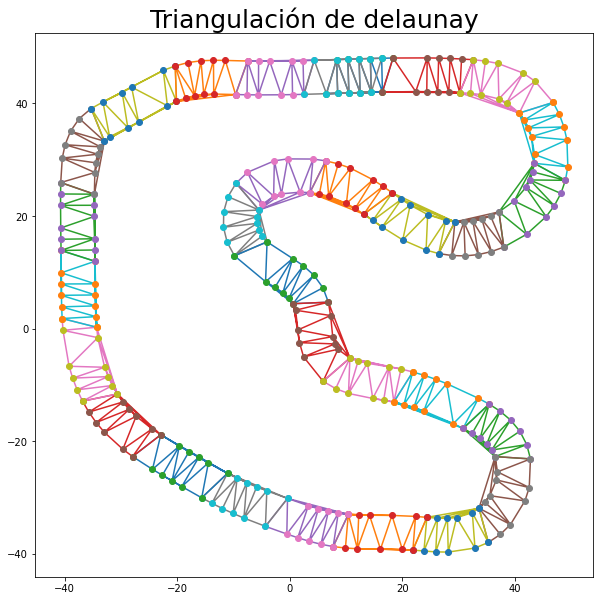

In [6]:
interv = 10
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
for i in range(interv, 2*total, interv):
    points = P[(i-interv):(i+2)]
    DT = Delaunay(points)
    plt.triplot(points[:,0], points[:,1], DT.simplices)
    plt.plot(points[:,0], points[:,1], 'o')
    plt.title('Triangulación de delaunay',
          fontsize=25,
          color="black")
plt.show()

## 2. Quitar bordes exteriores
* Definir restricciones. Se va a definir una lista de restricciones C en la que estaran conectados todos los nodos exteriores, el tamaño de esta lista sera igual que el del intervalo. 
Se definen de forma separada las conexiones internas y las exteriores

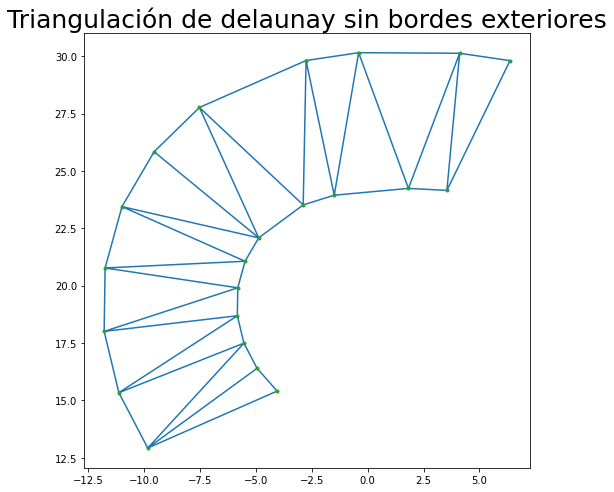

In [7]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

i = 100
interv = 20
points = P[(i-interv):(i+2)]

# Crear triangulacion con constantes
TR = Delaunay(points)
s = TR.simplices

i = 0
while (i < s.shape[0]):
#for i in range(0, s.shape[0]):
    x = s[i]
    if ((x[0]%2!=0 and x[1]%2!=0 and x[2]%2!=0) or (x[0]%2!=1 and x[1]%2!=1 and x[2]%2!=1)):
        s = np.delete(s, i, 0)
    else:
        
        i = i + 1;
plt.triplot(points[:,0], points[:,1], s)
plt.plot(points[:,0], points[:,1], '.')
plt.title('Triangulación de delaunay sin bordes exteriores',
      fontsize=25,
      color="black")
plt.show()

## 3. Encontrar los puntos medios de las conexiones internas
* Tendremos que encontrar el punto medio que hay entre las conexiones internas de conos de diferentes colores

In [8]:
def getEdges(triangle, edges, isEven):
    
    # t0 t1
    if (isEven[0]+isEven[1] == 1):
        #edges.append([triangle[0], triangle[1]])
        edges[triangle[0], triangle[1]] = 1
        edges[triangle[1], triangle[0]] = 1
    
    # t0 t2
    if (isEven[0]+isEven[2] == 1):
        #edges.append([triangle[0], triangle[2]])
        edges[triangle[0], triangle[2]] = 1
        edges[triangle[2], triangle[0]] = 1
        
    # t1 t2
    if (isEven[1]+isEven[2] == 1):
        #edges.append([triangle[1], triangle[2]])
        edges[triangle[1], triangle[2]] = 1
        edges[triangle[2], triangle[1]] = 1
        
    return edges

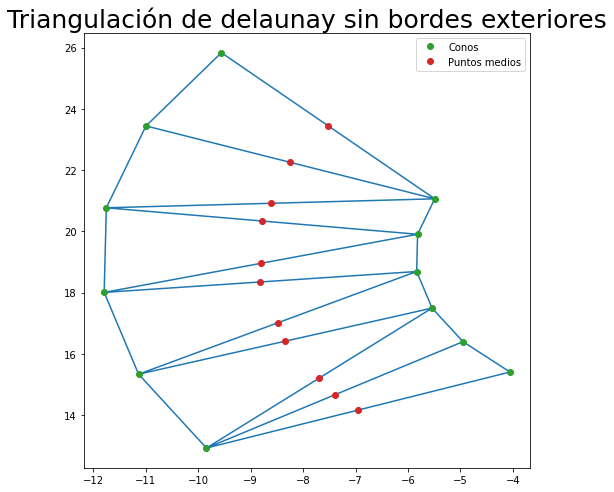

In [9]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

i = 100
interv = 10
points = P[(i-interv):(i+2)]
edgesMatrix = np.zeros([points.shape[0], points.shape[0]])
internalEdges = []
# Crear triangulacion con constantes
TR = Delaunay(points)
s = TR.simplices

i = 0
while (i < s.shape[0]):
#for i in range(0, s.shape[0]):
    x = s[i]
    isEven = x%2
    if ((isEven[0]==0 and isEven[1]==0 and isEven[2]==0) or (isEven[0]==1 and isEven[1]==1 and isEven[2]==1)):
        s = np.delete(s, i, 0)
    else:
        edgesMatrix = getEdges(x, edgesMatrix, isEven)
        i = i + 1;
                
for fila in range(0, points.shape[0]):
    for columna in range (0, fila):
        if (edgesMatrix [fila][columna] == 1): #Es uno interno
            p1 = points[fila]
            p2 = points[columna]
            
            internalEdges.append(np.array([(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]))
            
internal = np.array(internalEdges)       

plt.triplot(points[:,0], points[:,1], s)
plt.plot(points[:,0], points[:,1], 'o', label='Conos')
plt.plot(internal[:,0], internal[:,1], 'o', label='Puntos medios')
plt.legend()
plt.title('Triangulación de delaunay sin bordes exteriores',
      fontsize=25,
      color="black")
plt.show()


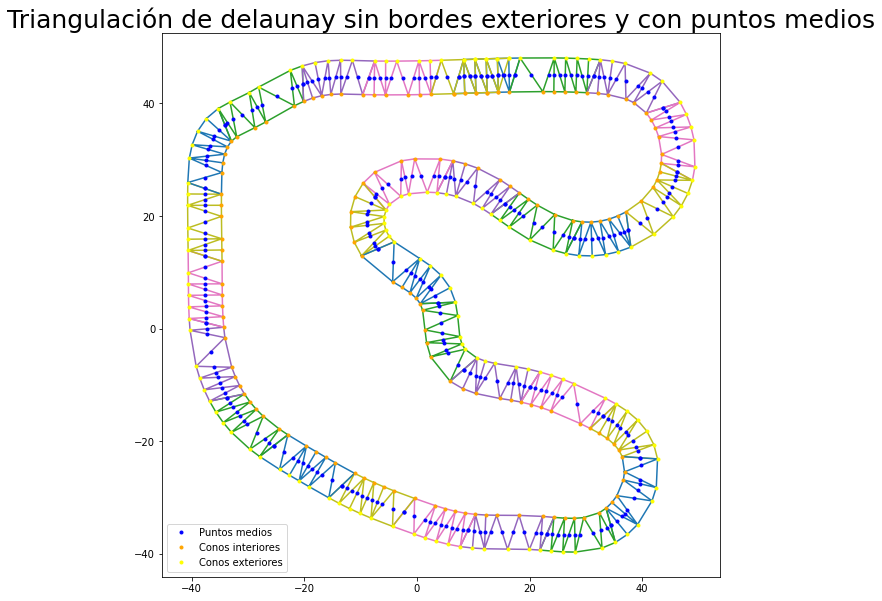

In [10]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

interv = 10
internalEdges = []
for i in range(interv, 2*total, interv):
    points = P[(i-interv):(i+2)]
    edgesMatrix = np.zeros([points.shape[0], points.shape[0]])
    #internalEdges = []
    # Crear triangulacion con constantes
    TR = Delaunay(points)
    s = TR.simplices

    i = 0
    while (i < s.shape[0]):
    #for i in range(0, s.shape[0]):
        x = s[i]
        isEven = x%2
        if ((isEven[0]==0 and isEven[1]==0 and isEven[2]==0) or (isEven[0]==1 and isEven[1]==1 and isEven[2]==1)):
            s = np.delete(s, i, 0)
        else:
            edgesMatrix = getEdges(x, edgesMatrix, isEven)
            i = i + 1;

    for fila in range(0, points.shape[0]):
        for columna in range (0, fila):
            if (edgesMatrix [fila][columna] == 1): #Es uno interno
                p1 = points[fila]
                p2 = points[columna]

                internalEdges.append(np.array([(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]))      

    plt.triplot(points[:,0], points[:,1], s)

internal = np.array(internalEdges)       
plt.plot(internal[:,0], internal[:,1], '.', label='Puntos medios', color='blue')
    
plt.title('Triangulación de delaunay sin bordes exteriores y con puntos medios',
          fontsize=25,
          color="black")
plt.plot(innerConePosition[:,0], innerConePosition[:,1], '.', label='Conos interiores', color='orange')
plt.plot(outerConePosition[:,0], outerConePosition[:,1], '.', label='Conos exteriores', color='yellow')
plt.legend()
plt.show()



## 4. Interpolar puntos medios
* Finalmente, para obtener un camino fluido y poco brusco interpolaremos la función que pasa por los puntos medios Pmp que hemos definido previamente
* Como condición de entrada se da por supuesto que los conos **estan ordenados de menor distancia al coche a mayor**


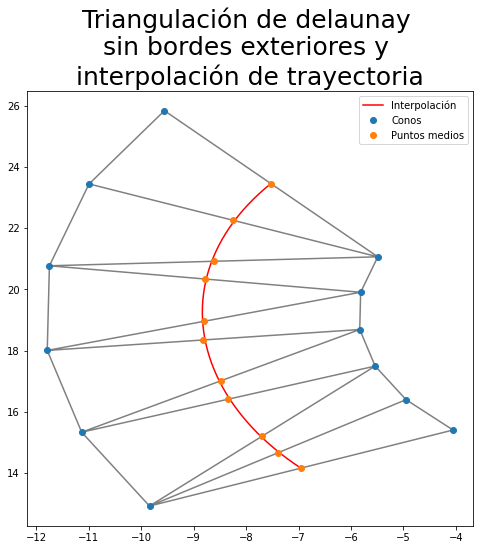

In [16]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

i = 100
interv = 10
points = P[(i-interv):(i+2)]
edgesMatrix = np.zeros([points.shape[0], points.shape[0]])
internalEdges = []
# Crear triangulacion con constantes
TR = Delaunay(points)
s = TR.simplices

i = 0
while (i < s.shape[0]):
#for i in range(0, s.shape[0]):
    x = s[i]
    isEven = x%2
    if ((isEven[0]==0 and isEven[1]==0 and isEven[2]==0) or (isEven[0]==1 and isEven[1]==1 and isEven[2]==1)):
        s = np.delete(s, i, 0)
    else:
        edgesMatrix = getEdges(x, edgesMatrix, isEven)
        i = i + 1;
                
for fila in range(0, points.shape[0]):
    for columna in range (0, fila):
        if (edgesMatrix [fila][columna] == 1): #Es uno interno
            p1 = points[fila]
            p2 = points[columna]
            
            internalEdges.append(np.array([(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]))
            
internal = np.array(internalEdges)       
tck,u = splprep([internal[:,0], internal[:,1]],k=3,s=32)

u=np.linspace(0,1,num=50,endpoint=True)
out = splev(u,tck)
plt.plot(out[0], out[1], label='Interpolación', color="red")
plt.triplot(points[:,0], points[:,1], s, color='grey')
plt.plot(points[:,0], points[:,1], 'o', label='Conos')
plt.plot(internal[:,0], internal[:,1], 'o', label='Puntos medios')
plt.legend()
plt.title('Triangulación de delaunay \nsin bordes exteriores y \ninterpolación de trayectoria',
      fontsize=25,
      color="black")
plt.show()

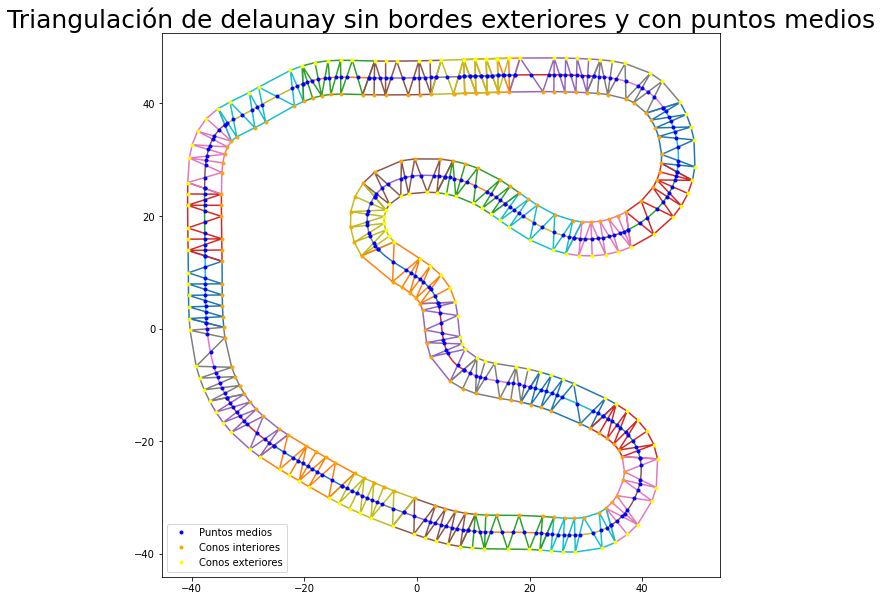

In [12]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

interv = 10
internalEdges = []
for i in range(interv, 2*total, interv):
    internal = []
    points = P[(i-interv):(i+2)]
    edgesMatrix = np.zeros([points.shape[0], points.shape[0]])
    #internalEdges = []
    # Crear triangulacion con constantes
    TR = Delaunay(points)
    s = TR.simplices

    i = 0
    while (i < s.shape[0]):
    #for i in range(0, s.shape[0]):
        x = s[i]
        isEven = x%2
        if ((isEven[0]==0 and isEven[1]==0 and isEven[2]==0) or (isEven[0]==1 and isEven[1]==1 and isEven[2]==1)):
            s = np.delete(s, i, 0)
        else:
            edgesMatrix = getEdges(x, edgesMatrix, isEven)
            i = i + 1;

    for fila in range(0, points.shape[0]):
        for columna in range (0, fila):
            if (edgesMatrix [fila][columna] == 1): #Es uno interno
                p1 = points[fila]
                p2 = points[columna]

                internal.append(np.array([(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]))  

    # Hay que arreglar TODO, 
    interna = np.array(internal)
    tck,u = splprep([interna[:,0], interna[:,1]],k=3,s=32)

    u=np.linspace(0,1,num=50,endpoint=True)
    out = splev(u,tck)
    plt.plot(out[0], out[1])
    internalEdges = internalEdges + internal
    plt.triplot(points[:,0], points[:,1], s)
    
internal = np.array(internalEdges)       
plt.plot(internal[:,0], internal[:,1], '.', label='Puntos medios', color='blue')
    
plt.title('Triangulación de delaunay sin bordes exteriores y con puntos medios',
          fontsize=25,
          color="black")
plt.plot(innerConePosition[:,0], innerConePosition[:,1], '.', label='Conos interiores', color='orange')
plt.plot(outerConePosition[:,0], outerConePosition[:,1], '.', label='Conos exteriores', color='yellow')
plt.legend()
plt.show()


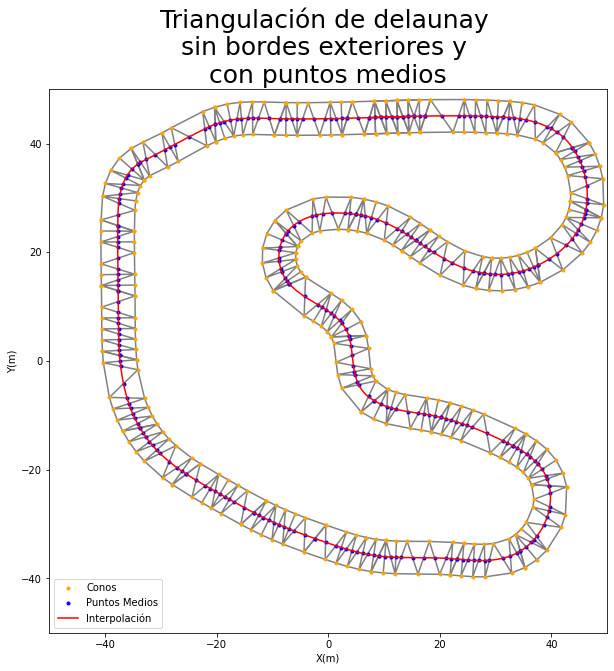

In [19]:
interv = 10 # Se cojeran conos de 10 en 10

# to run GUI event loop
plt.ion()


figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(111)
plt.xlim([-50, 50])
plt.ylim([-50, 50])

conosPlt, = ax.plot([],[], '.', label='Conos',color='orange')
puntosMediosPlt, = ax.plot([],[], '.',label='Puntos Medios',color='blue')
interpolacionPlt, = ax.plot([],[],label='Interpolación',color='red')

plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.title('Triangulación de delaunay \nsin bordes exteriores y \ncon puntos medios',
          fontsize=25,
          color="black")

plt.legend()
internalEdges = []
for i in range(interv, 2*total, interv):
    internal = []
    points = P[(i-interv):(i+2)]
    edgesMatrix = np.zeros([points.shape[0], points.shape[0]])
    
    # Crear triangulacion con constantes
    TR = Delaunay(points)
    s = TR.simplices

    i = 0
    while (i < s.shape[0]):
    #for i in range(0, s.shape[0]):
        x = s[i]
        isEven = x%2
        if ((isEven[0]==0 and isEven[1]==0 and isEven[2]==0) or (isEven[0]==1 and isEven[1]==1 and isEven[2]==1)):
            s = np.delete(s, i, 0)
        else:
            edgesMatrix = getEdges(x, edgesMatrix, isEven)
            i = i + 1;

    for fila in range(0, points.shape[0]):
        for columna in range (0, fila):
            if (edgesMatrix [fila][columna] == 1): #Es uno interno
                p1 = points[fila]
                p2 = points[columna]

                internal.append(np.array([(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]))  

    # Hay que arreglar TODO, 
    interna = np.array(internal)
    tck,u = splprep([interna[:,0], interna[:,1]],k=3,s=32)

    u=np.linspace(0,1,num=50,endpoint=True)
    out = splev(u,tck)
    
    interpolacionPlt.set_xdata(np.append(interpolacionPlt.get_xdata(),out[0]))
    interpolacionPlt.set_ydata(np.append(interpolacionPlt.get_ydata(),out[1]))
    
    conosPlt.set_xdata(np.append(conosPlt.get_xdata(),points[:,0]))
    conosPlt.set_ydata(np.append(conosPlt.get_ydata(),points[:,1]))
    
    puntosMediosPlt.set_xdata(np.append(puntosMediosPlt.get_xdata(),interna[:,0]))
    puntosMediosPlt.set_ydata(np.append(puntosMediosPlt.get_ydata(),interna[:,1]))
    
    plt.triplot(points[:,0], points[:,1], s, color='grey')
    
    # drawing updated values
    figure.canvas.draw()

    # This will run the GUI event
    # loop until all UI events
    # currently waiting have been processed
    figure.canvas.flush_events()
    time.sleep(0.1)

## ERRORES
Reproducción de los errores del simulador

In [123]:
def ordenar_respecto(coche, lista):
    x = coche[0]
    y = coche[1]
    return sorted(lista, key = lambda p: (p[0] - x)**2 + (p[1] - y)**2)

In [124]:
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

In [ ]:
out_points = [[8.589937210083008, -3.3124613761901855],[5.000889778137207, -3.276102304458618],[12.327032089233398, -2.450221300125122]]
in_points = [[12.79356575012207, 2.327507734298706],[9.07925033569336, 1.6913830041885376],[5.420897960662842, 1.6431074142456055]]

out_points = ordenar_respecto([0,0], out_points)
in_points = ordenar_respecto([0,0], in_points)

points = np.zeros([len(in_points)*2, 2])
for i in range(0, len(in_points)):
    points[2*i] = in_points[i]
    points[2*i+1] = out_points[i]

xmax, ymax = points.max(axis=0)
xmin, ymin = points.min(axis=0)

ab = AnnotationBbox(getImage('img/coche.png', zoom=0.4), (0, 0), frameon=False)
fig, ax = plt.subplots()

fig.set_figwidth(13)
fig.set_figheight(10)

ax.set_xlim([-2.0, xmax+1.0])
ax.set_ylim([ymin-2.0, ymax+2.0])

edgesMatrix = np.zeros([points.shape[0], points.shape[0]])
internalEdges = []

# Posición del eje de dirección (No esta bien)
dirX=2.0
dirY=0.0
internalEdges.append(np.array([dirX,dirY])) # Para despues hacer la trayectoria desde el morro del coche
# Crear triangulacion con constantes
TR = Delaunay(points)
s = TR.simplices

i = 0
while (i < s.shape[0]):
#for i in range(0, s.shape[0]):
    x = s[i]
    isEven = x%2
    if ((isEven[0]==0 and isEven[1]==0 and isEven[2]==0) or (isEven[0]==1 and isEven[1]==1 and isEven[2]==1)):
        s = np.delete(s, i, 0)
    else:
        edgesMatrix = getEdges(x, edgesMatrix, isEven)
        i = i + 1;
                
for fila in range(0, points.shape[0]):
    for columna in range (0, fila):
        #print(str(fila)+', '+str(columna))
        if (edgesMatrix [fila][columna] == 1): #Es uno interno
            p1 = points[fila]
            p2 = points[columna]
            
            internalEdges.append(np.array([(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]))


internal = np.array(internalEdges) 
points_mal = np.transpose(internal)
tck,u = splprep([internal[:,0], internal[:,1]],k=3,s=32)

u=np.linspace(0,1,num=50,endpoint=True)
out = splev(u,tck)


plt.plot(out[0], out[1], label='Interpolación', color="red")
plt.triplot(points[:,0], points[:,1], s, color='grey')
plt.plot(points[:,0], points[:,1], 'o', label='Conos')
plt.plot(internal[1:,0], internal[1:,1], 'o',label='Puntos medios')
ax.add_artist(ab)
plt.legend()
plt.title('Triangulación de delaunay \nsin bordes exteriores y \ninterpolación de trayectoria',
      fontsize=25,
      color="black")
plt.show()